In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from math import exp
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata
plt.style.use('fivethirtyeight')
%matplotlib inline

# Introduction

# What's Classification?
 - assigning labels to things
   - the other option is regression (assigning numerical output, like vectors to inputs)

# What's supervised learning?
 - learning from input/output examples
 - not trying to find some structure, the output is clearly defined

# What are we actually doing here?
 - classification + supervised
 - 2 datasets, simple and more complex

# Breast Cancer Wisconsin (Diagnostic) Dataset
![alt text](https://upload.wikimedia.org/wikipedia/commons/e/e6/Invasive_Ductal_Carcinoma_40x.jpg)

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
print(cancer.target_names)

['malignant' 'benign']


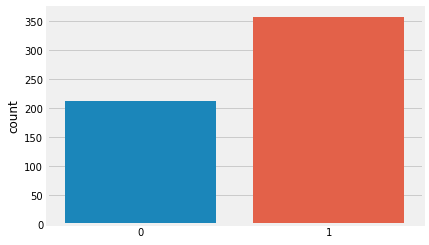

In [4]:
ax = sns.countplot(cancer.target,label="Count")

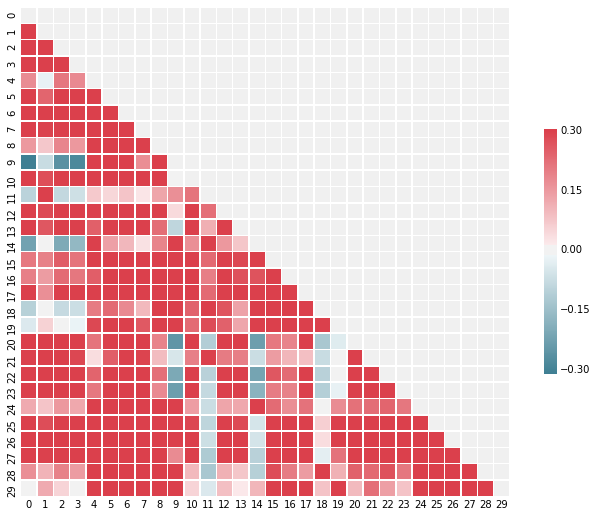

In [5]:
d = pd.DataFrame(cancer.data)
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.953
Accuracy on the training set: 0.958


# MNIST
 - standard Computer-Vision "toy" dataset
 - dataset of handwritten digits, 0-9

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [32]:
mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target

In [33]:
print(mnist.DESCR)

mldata.org dataset: mnist-original


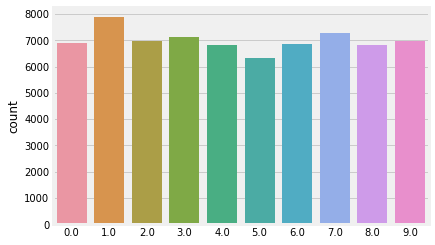

In [27]:
ax = sns.countplot(y,label="Count")

In [28]:
print(mnist.data.shape)

(70000, 784)


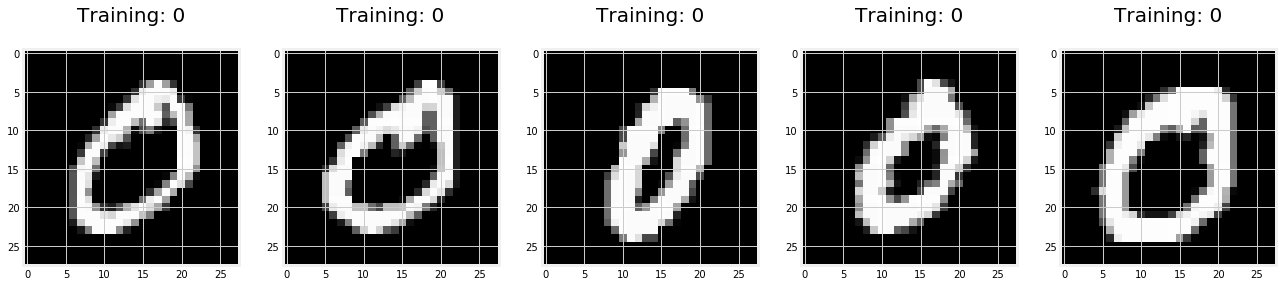

In [31]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

for the Neural Network, mnist gets transformed into an 784 (=28x28) vector of (-1, 1) grayscale values

# NUMPY
math in python is slow, numpy makes it fast. Just prepend your commands with `n` and use the cheatsheet

In [35]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

e = np.random.random((2,2))  # Create an array filled with random values

print(a[0, 1])   # Prints "2"

2


In [38]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)

[[ 6.  8.]
 [10. 12.]]


In [40]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]
